In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## arch avg salary
https://www.zus.pl/baza-wiedzy/skladki-wskazniki-odsetki/wskazniki/przecietne-wynagrodzenie-w-latach

In [2]:
df = pd.read_html('https://www.zus.pl/baza-wiedzy/skladki-wskazniki-odsetki/wskazniki/przecietne-wynagrodzenie-w-latach', thousands=None, decimal=',')
print(f'Total tables: {len(df)}')

Total tables: 2


In [3]:
avg_salary = df[1]

avg_salary['Lata'] = pd.to_datetime(avg_salary['Lata'], format= '%Y')
avg_salary['Przeciętne wynagrodzenie w zł'] = avg_salary['Przeciętne wynagrodzenie w zł'].str.replace(',', '.')
avg_salary['Przeciętne wynagrodzenie w zł'] = avg_salary['Przeciętne wynagrodzenie w zł'].str.replace(" ", "")
avg_salary['Przeciętne wynagrodzenie w zł'] = avg_salary['Przeciętne wynagrodzenie w zł'].apply(pd.to_numeric)
avg_salary['month'] = avg_salary['Przeciętne wynagrodzenie w zł'] / 12
avg_salary.columns = ['date', 'avg salary', 'check', 'month']
pd.options.display.float_format = '{:.2f}'.format
avg_salary

,date,avg salary,check,month
0,1950-01-01,6612.00,(551 x 12),551.00
1,1951-01-01,7188.00,(599 x 12),599.00
2,1952-01-01,7824.00,(652 x 12),652.00
3,1953-01-01,11040.00,(920 x 12),920.00
4,1954-01-01,11700.00,(975 x 12),975.00
...,...,...,...,...
67,2017-01-01,51258.12,"(4271,51 x 12)",4271.51
68,2018-01-01,55020.36,"(4585,03 x 12)",4585.03
69,2019-01-01,59018.04,"(4918,17 x 12)",4918.17
70,2020-01-01,62009.64,"(5167,47 x 12)",5167.47


In [4]:
dewaluacja = avg_salary.query ('date > 1994')
dewaluacja['date'] = pd.to_datetime(dewaluacja['date']).dt.year
dewaluacja

C:\Users\Dell\AppData\Local\Temp\ipykernel_10892\4057139110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dewaluacja['date'] = pd.to_datetime(dewaluacja['date']).dt.year


,date,avg salary,check,month
45,1995,8431.44,"(702,62 x 12)",702.62
46,1996,10476.00,"(873,00 x 12)",873.00
47,1997,12743.16,"(1061,93 x 12)",1061.93
48,1998,14873.88,"(1239,49 x 12)",1239.49
49,1999,20480.88,"(1706,74 x 12)",1706.74
50,2000,23085.72,"(1923,81 x 12)",1923.81
51,2001,24742.20,"(2061,85 x 12)",2061.85
52,2002,25598.52,"(2133,21 x 12)",2133.21
53,2003,26417.64,"(2201,47 x 12)",2201.47
54,2004,27474.84,"(2289,57 x 12)",2289.57


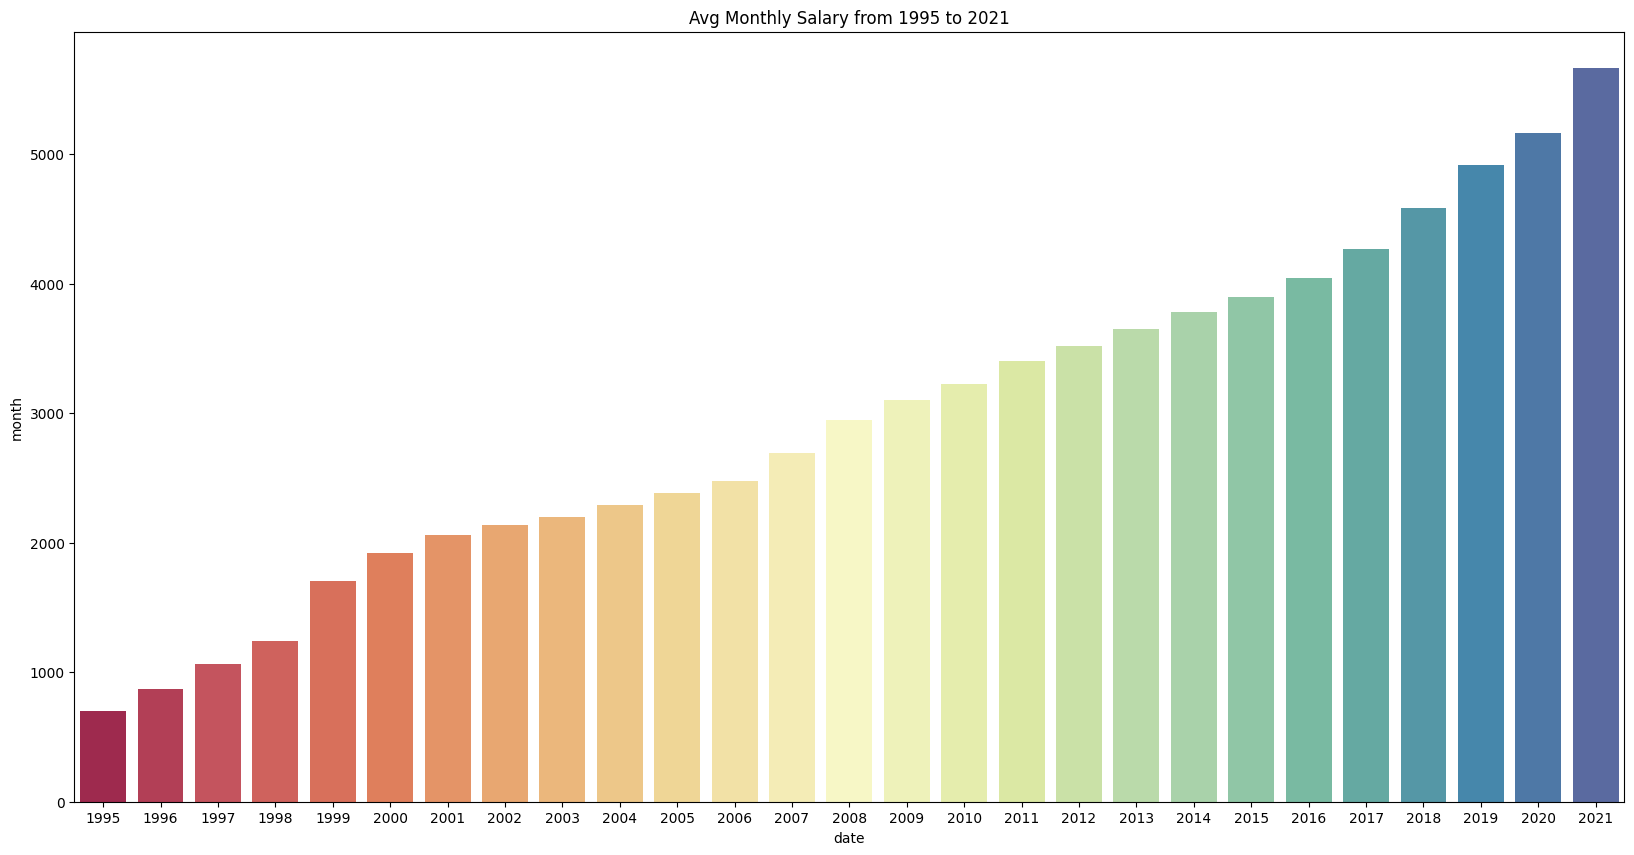

In [5]:
plt.figure(figsize=(20,10))
plt.title("Avg Monthly Salary from 1995 to 2021")
sns.barplot(data = dewaluacja, x = 'date', y = 'month',  palette='Spectral');

## arch min salary
https://zus.pox.pl/zus/minimalne-wynagrodzenie-za-prace-obecnie-i-w-przeszlosci.htm

In [6]:
df1 = pd.read_html('https://zus.pox.pl/zus/minimalne-wynagrodzenie-za-prace-obecnie-i-w-przeszlosci.htm', thousands=None, decimal=',')
print(f'Total tables: {len(df1)}')


Total tables: 10


In [7]:
min_salary = df1[1]
min_salary

,Od kiedy obowiązuje,Minimalne wynagrodzenie za pracę
0,01/07/2023,"3 450,00 zł"
1,01/01/2023,"3 383,00 zł"
2,01/01/2022,"3 010,00 zł"
3,01/01/2021,"2 800,00 zł"
4,01/01/2020,"2 600,00 zł"
5,01/01/2019,"2 250,00 zł"
6,01/01/2018,"2 100,00 zł"
7,01/01/2017,"2 000,00 zł"
8,01/01/2016,"1 850,00 zł"
9,01/01/2015,"1 750,00 zł"


In [8]:
min_salary = df1[1]

min_salary['Od kiedy obowiązuje'] = pd.to_datetime(min_salary['Od kiedy obowiązuje'], format= '%d/%m/%Y')
min_salary["Minimalne wynagrodzenie za pracę"] = min_salary["Minimalne wynagrodzenie za pracę"].str.replace("zł","")
min_salary['Minimalne wynagrodzenie za pracę'] = min_salary['Minimalne wynagrodzenie za pracę'].str.replace(',', '.')
min_salary['Minimalne wynagrodzenie za pracę'] = min_salary['Minimalne wynagrodzenie za pracę'].str.replace(" ", "")
min_salary['Minimalne wynagrodzenie za pracę'] = min_salary['Minimalne wynagrodzenie za pracę'].apply(pd.to_numeric)


min_salary.columns = ['date', 'min salary']
pd.options.display.float_format = '{:.2f}'.format
min_salary



,date,min salary
0,2023-07-01,3450.00
1,2023-01-01,3383.00
2,2022-01-01,3010.00
3,2021-01-01,2800.00
4,2020-01-01,2600.00
5,2019-01-01,2250.00
6,2018-01-01,2100.00
7,2017-01-01,2000.00
8,2016-01-01,1850.00
9,2015-01-01,1750.00


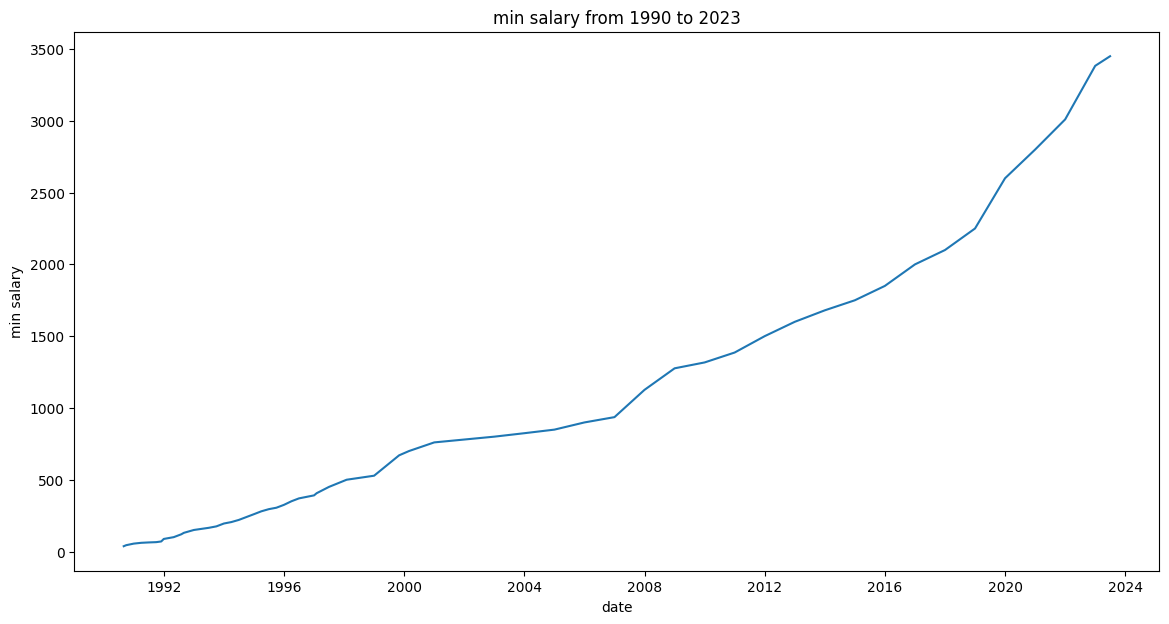

In [9]:
plt.figure(figsize=(14,7))
plt.title('min salary from 1990 to 2023')
sns.lineplot(x = 'date', y = 'min salary', data = min_salary);

In [10]:
min_salary.to_csv('min_salary.csv', index=False)
dewaluacja.to_csv('avg_salary.csv', index=False)